In [23]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("winequality-red.csv")

In [6]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [15]:
columns = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

In [25]:
train_accuracy = [0.5]
test_accuracy = [0.5]

for max_depth in range(1,26):
    
    clf = tree.DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(df_train[columns], df_train.quality)
    
    train_predictions = clf.predict(df_train[columns])
    test_predictions = clf.predict(df_test[columns])
    
    train_accuracy.append(metrics.accuracy_score(df_train.quality, train_predictions))
    test_accuracy.append(metrics.accuracy_score(df_test.quality, test_predictions))
    
    

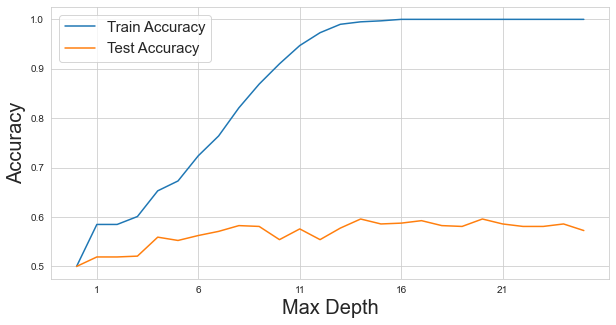

In [26]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracy,label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(1,26,5))
plt.xlabel("Max Depth",size=20)
plt.ylabel("Accuracy", size = 20)
plt.show()